### **Preparation**

### Import Libraries

In [2]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Load Dataset

In [2]:
# Load dataset
filename = "data/iris.data.csv"
names = ["sepal-length", "sepal-width", "petal-length", "petal-width", "class"]
dataset = pd.read_csv(filename, names=names)

### **Summarize Data**

In [3]:
# Shape of dataset
print(dataset.shape)

(150, 5)


In [4]:
# Peek at dataset
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [5]:
# Statistical summary
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [6]:
# Class distribution
print(dataset.groupby("class").size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### **Data Visualization**

### Univariate Plots

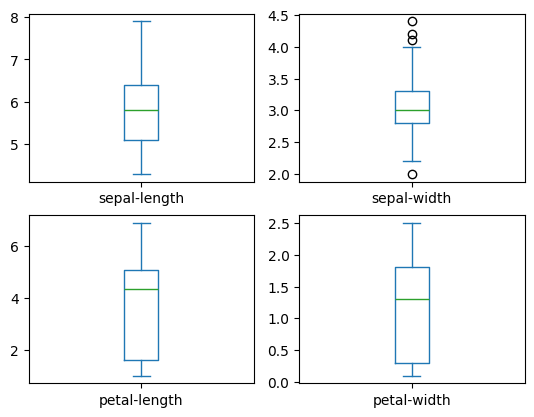

In [ ]:
# box and whisker plots
dataset.plot(kind="box", subplots=True, layout=(2, 2), sharex=False, sharey=False)
plt.show()

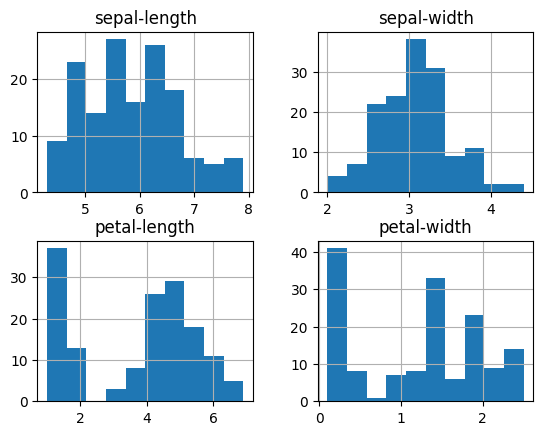

In [9]:
# histograms
dataset.hist()
plt.show()

### Multivariate Plots

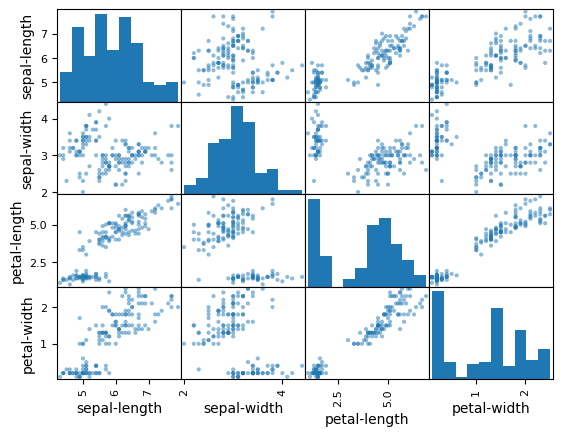

In [11]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

### **Evaluate Some Algorithms**

In [ ]:
# Split-out validation dataset
array = dataset.values
X = array[:, 0:4]
y = array[:, 4]
validation_size = 0.20
seed = 7
X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=validation_size, random_state=seed
)


In [17]:
# Spot-check algorithms
models = []
models.append(("LR", LogisticRegression(solver="lbfgs", max_iter=1000)))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC(gamma="auto")))

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")

LR: 0.9833 (0.0333)
LDA: 0.9750 (0.0382)
KNN: 0.9833 (0.0333)
CART: 0.9583 (0.0768)
NB: 0.9667 (0.0408)
SVM: 0.9917 (0.0250)


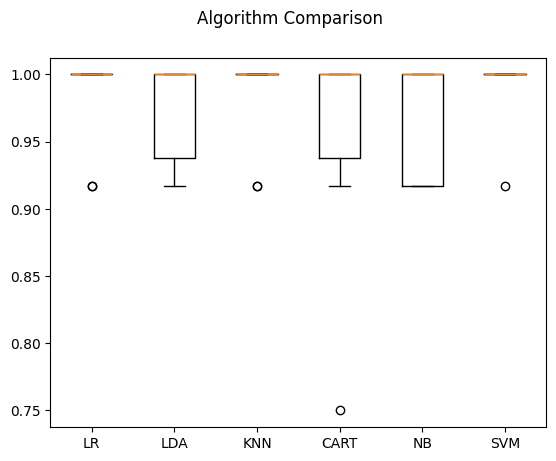

In [18]:
# Compare algorithms
fig = plt.figure()
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### **Make Predictions**

In [ ]:
# Make predictions on validation dataset using the SVM model
model = SVC(gamma="auto")
model.fit(X_train, y_train)
predictions = model.predict(X_validation)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



In [20]:
# Make predictions on validation dataset using the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

